In [3]:
# import pandas as pd
# import numpy as np
# import os
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers,  Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model
# from  matplotlib import pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline

ImportError: cannot import name 'InputLayer' from 'tensorflow.keras' (unknown location)

In [2]:
!pip install opencv-python

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, make_scorer, f1_score, confusion_matrix
from sklearn.datasets import make_classification
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import data, exposure
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [8]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [32]:

# #

# import glob

# images = []
# classes = []
# classes.extend([file.split("\\")[3].split("_")[1].split(".")[0]for file in glob.glob('trafficsigns_dataset/*/*/*.png')])
# images.extend([(file) for file in glob.glob('trafficsigns_dataset/*/*/*.png')])

In [43]:
## this is to create two csv classes, one for sign shape and the other for sign types. Change the [1 or 2]

import glob
images = []
classes = []
classes.extend([file.split("\\")[2] for file in glob.glob('trafficsigns_dataset/*/*/*.png')])
images.extend([(file) for file in glob.glob('trafficsigns_dataset/*/*/*.png')])

In [45]:
## to print out csv

dict = {'image_path': images, 'class': classes} 
predict_df = pd.DataFrame(dict)
predict_df.to_csv('signboardimage2.csv', index=False)

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('./signboardimage2.csv')

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2219, Val Data: 740, Test Data: 740


In [50]:
train_data['class'] = train_data['class'].astype('str')
val_data['class'] = val_data['class'].astype('str')

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="class",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="class",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


(28, 28)

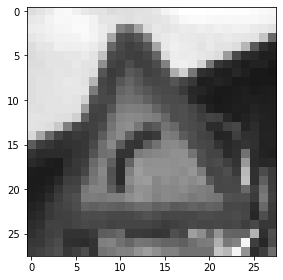

In [57]:
img = imread(data['image_path'][3500])
imshow(img)
img.shape